PROJECT DOMAIN: BANKING

PROJECT TITLE : CREDIT CARD FRAUD DETECTION 

OVERVIEW:
        This project aims to build a model with time series to detect fraud using logistic regression, DecisionTreeClassifier, RandomForestClassifier.Fraud detection is an important case for machine learning in industries like banking.

OJECTIVE: 
         Detect whether the credict card is fraud or not.

OUTCOME: 
         A trained model that can classify on the basis of fraud or not using logistic regression  

TOOLS:
     Programming Language: Python
     
LIBRARIES:
    Data Manipulation: Pandas
    Machine Learning: Sklearn
    Data Visualization: Matplotlib, Seaborn
    Time Series Handling: Pandas
    Model Evaluation: Sklearn.metrics


1) IMPORT THE NECESSARY LIBRARIES:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn import tree

2) IMPORT THE DATASET
   (since the dataset has datetime column use parse_dates) 

In [3]:
data=pd.read_csv('fraud test.csv',parse_dates=['trans_date_trans_time']) #converting the datatype str to Timestamp using parse_dates

3) DATA VISUALIZATION

In [4]:
df=data.copy()   # Make a copy of the daataset to not affect the original dataset

In [5]:
pd.set_option('display.max_columns',23)  # View the maximun number of columns

In [6]:
df.head()     # Returns the first five rows

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
df.shape    # View the no.of. rows and columns

(555719, 23)

In [8]:
df.info()   # Concise summary of the Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  float64       
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [9]:
df.describe()  #Generate descriptive statistic of the dataset

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
df.columns  # View all the column names

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
df['is_fraud'].unique()   # Check the array of distinct values of the Target column

array([0, 1], dtype=int64)

In [12]:
type(df.trans_date_trans_time[0])   # view the datatype of the timeseries column

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df.isnull().sum()     #check the null values(There is no null values)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
df.duplicated().sum()     #check the duplicte values (There is no duplicate values)

0

4) EDA PROCESS
      - Drop the unwanted columns
      - Do set_index 
      - Do LabelEncoding for object columns
      - Plot to find the outliers
      - Remove outliers  

In [15]:
df.drop(columns={'Unnamed: 0','merchant','first','last','gender','street','city','state','lat','long','city_pop','merch_lat','merch_long','unix_time'},inplace=True)

In [16]:
df.set_index('trans_date_trans_time',inplace=True)    #making the datetime64 column as index to plot
df

,cc_num,category,amt,zip,job,dob,trans_num,is_fraud
trans_date_trans_time,,,,,,,,
2020-06-21 12:14:00,2.291160e+15,personal_care,2.86,29209,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,0
2020-06-21 12:14:00,3.573030e+15,personal_care,29.84,84002,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,0
2020-06-21 12:14:00,3.598220e+15,health_fitness,41.28,11710,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,0
2020-06-21 12:15:00,3.591920e+15,misc_pos,60.05,32780,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,0
2020-06-21 12:15:00,3.526830e+15,travel,3.19,49632,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,0
...,...,...,...,...,...,...,...,...
2020-12-31 23:59:00,3.056060e+13,health_fitness,43.77,63453,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,0
2020-12-31 23:59:00,3.556610e+15,kids_pets,111.84,77566,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,0
2020-12-31 23:59:00,6.011720e+15,kids_pets,86.88,99323,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,0


In [17]:
label_encoder=LabelEncoder()  #passing instance for label encoder

In [18]:
for i in df.columns:
    if df[i].dtype == 'object':
         df[i]=label_encoder.fit_transform(df[i])     #convert the categorical column to numerical

In [19]:
df.head()         

,cc_num,category,amt,zip,job,dob,trans_num,is_fraud
trans_date_trans_time,,,,,,,,
2020-06-21 12:14:00,2.291160e+15,10,2.86,29209,275,544,98699,0
2020-06-21 12:14:00,3.573030e+15,10,29.84,84002,392,481,108785,0
2020-06-21 12:14:00,3.598220e+15,5,41.28,11710,259,622,433979,0
2020-06-21 12:15:00,3.591920e+15,9,60.05,32780,407,732,71993,0
2020-06-21 12:15:00,3.526830e+15,13,3.19,49632,196,169,190585,0


{'whiskers': [<matplotlib.lines.Line2D at 0x259430c74f0>,
 'caps': [<matplotlib.lines.Line2D at 0x259430c7ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x259430c7370>,
 'medians': [<matplotlib.lines.Line2D at 0x25944e590a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25944e59370>,
 'means': []}

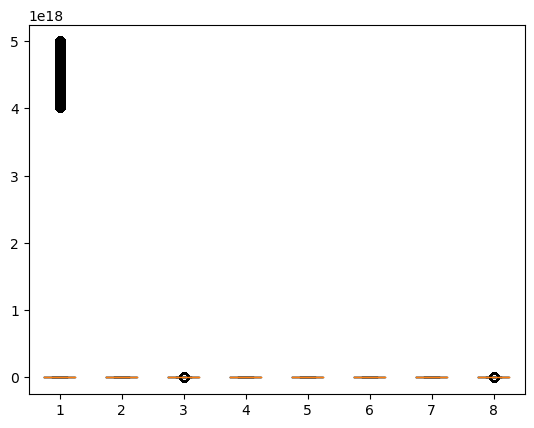

In [20]:
plt.boxplot(df)    #plot to view outliers

In [21]:
#Using IQR method to remove outliers
#using trimming since the datset is large
  

q3=df['cc_num'].quantile(0.75)
q1=df['cc_num'].quantile(0.25)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
df=df[~(df['cc_num']<upper_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2593d6e98b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2593d6e9e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2593d6e95e0>,
 'medians': [<matplotlib.lines.Line2D at 0x2593d6f9430>,
 'fliers': [<matplotlib.lines.Line2D at 0x2593d6f9700>,
 'means': []}

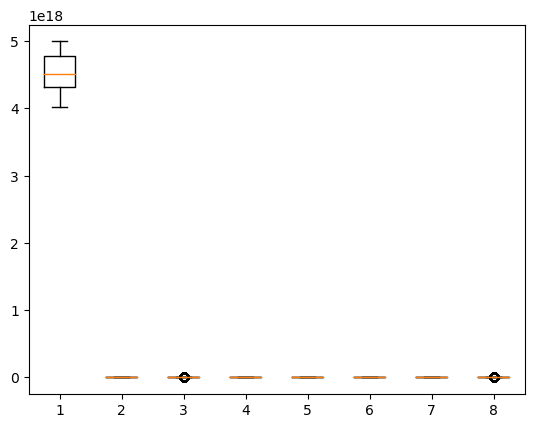

In [22]:
plt.boxplot(df)

In [23]:
cor=df.corr()        #check the correlation
cor

,cc_num,category,amt,zip,job,dob,trans_num,is_fraud
cc_num,1.000000,0.000573,-0.000402,-0.163650,0.055548,0.192530,-0.002649,0.019648
category,0.000573,1.000000,0.023012,0.007440,0.003527,0.005875,0.002845,0.006544
amt,-0.000402,0.023012,1.000000,-0.004406,-0.016322,-0.004795,-0.000912,0.114406
zip,-0.163650,0.007440,-0.004406,1.000000,0.107926,-0.194417,0.002013,-0.010189
job,0.055548,0.003527,-0.016322,0.107926,1.000000,0.124887,0.001894,-0.003515
dob,0.192530,0.005875,-0.004795,-0.194417,0.124887,1.000000,0.000708,-0.026149
trans_num,-0.002649,0.002845,-0.000912,0.002013,0.001894,0.000708,1.000000,-0.001916
is_fraud,0.019648,0.006544,0.114406,-0.010189,-0.003515,-0.026149,-0.001916,1.000000


5) MODEL BUILDING
       - divide inputs and Target columns (x and y)
       - split the dataset into training and testing 
       - fit and predict 
       - use metrics to find accuracy

In [24]:
x=df.iloc[:,:-1]       
x

,cc_num,category,amt,zip,job,dob,trans_num
trans_date_trans_time,,,,,,,
2020-06-21 12:18:00,4.906630e+18,12,2.33,33040,460,347,1849
2020-06-21 12:19:00,4.861310e+18,0,80.11,70774,428,478,246722
2020-06-21 12:20:00,4.560000e+18,7,37.95,80951,291,252,384567
2020-06-21 12:29:00,4.110270e+18,7,31.19,38778,137,180,502769
2020-06-21 12:31:00,4.855490e+18,10,68.88,5654,15,848,352980
...,...,...,...,...,...,...,...
2020-12-31 23:25:00,4.537000e+18,0,11.24,87533,218,522,2295
2020-12-31 23:31:00,4.989850e+18,12,7.58,29127,28,257,137988
2020-12-31 23:34:00,4.312130e+18,10,1.60,21208,96,322,6058


In [25]:
y=df.iloc[:,-1:]
y                        #  Target column is binary (0,1)

,is_fraud
trans_date_trans_time,
2020-06-21 12:18:00,0
2020-06-21 12:19:00,0
2020-06-21 12:20:00,0
2020-06-21 12:29:00,0
2020-06-21 12:31:00,0
...,...
2020-12-31 23:25:00,0
2020-12-31 23:31:00,0
2020-12-31 23:34:00,0


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=666) #model_selection

In [28]:
#Logistic Regression__________________

lg=LogisticRegression()

In [29]:
lg.fit(x_train,y_train)         # fit- Trains the model in training dataset

C:\Users\skaar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skaar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred=lg.predict(x_test)                # Predict - Predict the x_test
accuracy=accuracy_score(y_test,y_pred)   # accuracy_score is a metrics used for classification models to find accuracy 

In [31]:
accuracy*100

99.66001961425303

In [ ]:
y_probs=lg.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test, y_probs)   # Compute the ROC curv

In [ ]:
auc_score = roc_auc_score(y_test, y_probs)
auc_score

In [32]:
#DecisionTree_____________________

dtc=DecisionTreeClassifier(criterion="entropy", max_depth=2) #entropy nide-measures the impurities,
                                                             #max_depth-no.of.edges from root node

In [33]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [34]:
y_pred=dtc.predict(x_test)

In [35]:
acc=accuracy_score(y_pred,y_test)

In [36]:
acc*100

99.66001961425303

[Text(0.5, 0.8333333333333334, 'X[2] <= 252.42\nentropy = 0.034\nsamples = 35687\nvalue = [35561, 126]'),
 Text(0.25, 0.5, 'X[2] <= 23.915\nentropy = 0.013\nsamples = 34685\nvalue = [34644, 41]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.028\nsamples = 12169\nvalue = [12134, 35]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.004\nsamples = 22516\nvalue = [22510, 6]'),
 Text(0.75, 0.5, 'X[2] <= 712.53\nentropy = 0.419\nsamples = 1002\nvalue = [917, 85]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.285\nsamples = 824\nvalue = [783, 41]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.807\nsamples = 178\nvalue = [134, 44]')]

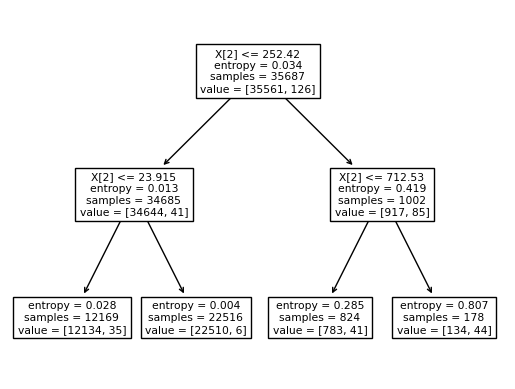

In [37]:
tree.plot_tree(dtc)    #tree plotting

In [38]:
#Random Forest_____________________

rfc=RandomForestClassifier(n_estimators =100)   #n_estimators-no.of.decision trees

In [39]:
rfc.fit(x_train,y_train)

C:\Users\skaar\AppData\Local\Temp\ipykernel_11000\4070307935.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier()

In [40]:
y_pred=rfc.predict(x_test)

In [41]:
accu=accuracy_score(y_pred,y_test)

In [42]:
accu*100

99.7777051323962

6) DISPLAY THE PLOT

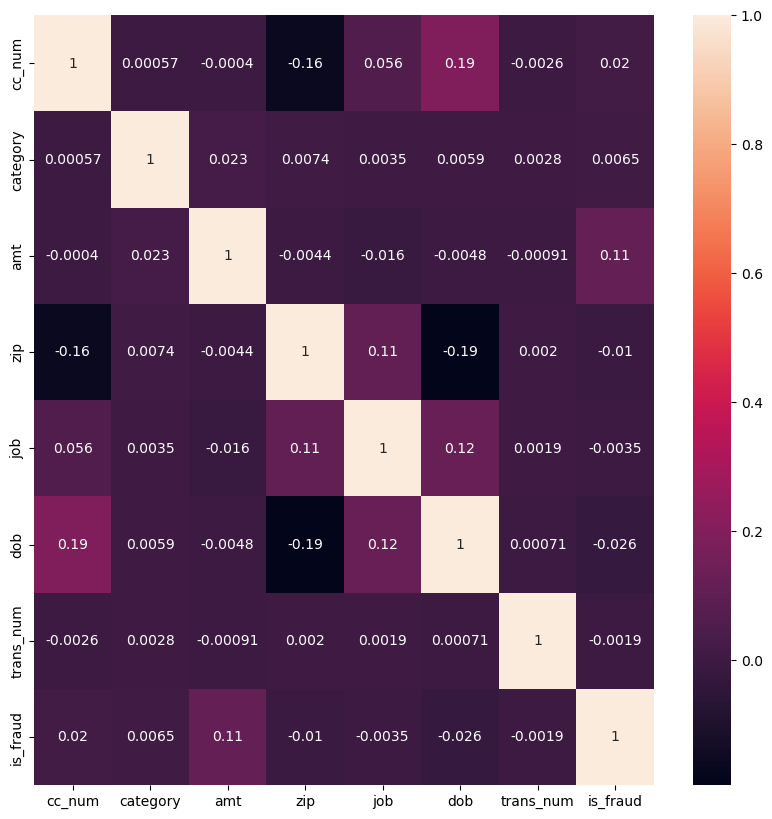

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

7) CONCLUSION

This project demonstrates how different models can be applied to TimeSeries dataset for fraud detection, also the tree and correlation maps are plotted.